In [171]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from keras.datasets import fashion_mnist
from keras.layers import Flatten, Dense, Dropout, Normalization
from keras.models import Sequential

In [172]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [173]:
X_valid, X_train = x_train[:5000] / 255.0, x_train[5000:] / 255.0
y_valid, y_train = y_train[:5000], y_train[5000:]

X_train = X_train.reshape(-1, 784)
X_test = x_test.reshape(-1, 784)
X_valid = X_valid.reshape(-1, 784)

In [174]:
model = Sequential()
model.add(Dense(1000, activation='relu', input_dim=784))
model.add(Dropout(0,2))
model.add(Dense(300, activation='relu'))
model.add(Dropout(0,2))
model.add(Dense(20, activation='softmax'))

In [175]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [176]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_47 (Dense)            (None, 1000)              785000    
                                                                 
 dropout_32 (Dropout)        (None, 1000)              0         
                                                                 
 dense_48 (Dense)            (None, 300)               300300    
                                                                 
 dropout_33 (Dropout)        (None, 300)               0         
                                                                 
 dense_49 (Dense)            (None, 20)                6020      
                                                                 
Total params: 1091320 (4.16 MB)
Trainable params: 1091320 (4.16 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [177]:
history = model.fit(
    X_train,
    y_train,
    epochs=20,
    batch_size=100,
    validation_split=0.2,
    validation_data=(X_valid, y_valid)
)

Epoch 1/20
550/550 [==============================] - 14s 25ms/step - loss: 0.4857 - accuracy: 0.8281 - val_loss: 0.3818 - val_accuracy: 0.8650
Epoch 2/20
550/550 [==============================] - 14s 25ms/step - loss: 0.3552 - accuracy: 0.8699 - val_loss: 0.3404 - val_accuracy: 0.8820
Epoch 3/20
550/550 [==============================] - 13s 24ms/step - loss: 0.3201 - accuracy: 0.8818 - val_loss: 0.3342 - val_accuracy: 0.8760
Epoch 4/20
550/550 [==============================] - 15s 26ms/step - loss: 0.2953 - accuracy: 0.8907 - val_loss: 0.3092 - val_accuracy: 0.8878
Epoch 5/20
550/550 [==============================] - 13s 24ms/step - loss: 0.2813 - accuracy: 0.8941 - val_loss: 0.3018 - val_accuracy: 0.8854
Epoch 6/20
550/550 [==============================] - 13s 24ms/step - loss: 0.2623 - accuracy: 0.9022 - val_loss: 0.3175 - val_accuracy: 0.8898
Epoch 7/20
550/550 [==============================] - 14s 25ms/step - loss: 0.2500 - accuracy: 0.9049 - val_loss: 0.2932 - val_accuracy:

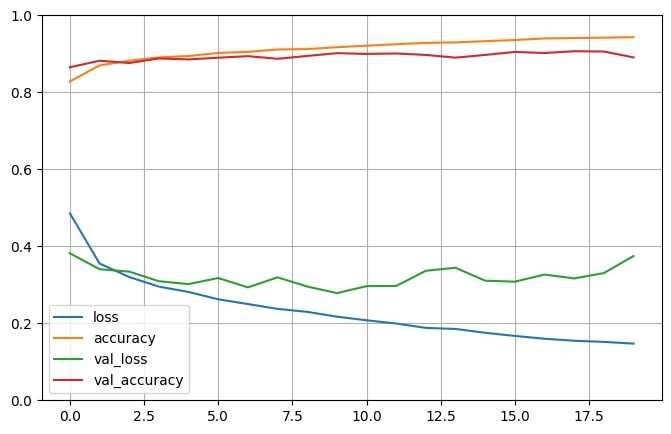

In [178]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [179]:
scores = model.evaluate(X_test, y_test)
print("Відсоток правильних відповідей на тесті: ", round(scores[1] * 100, 4))

313/313 [==============================] - 2s 4ms/step - loss: 59.9738 - accuracy: 0.8879
Відсоток правильних відповідей на тесті:  88.79


313/313 [==============================] - 1s 4ms/step


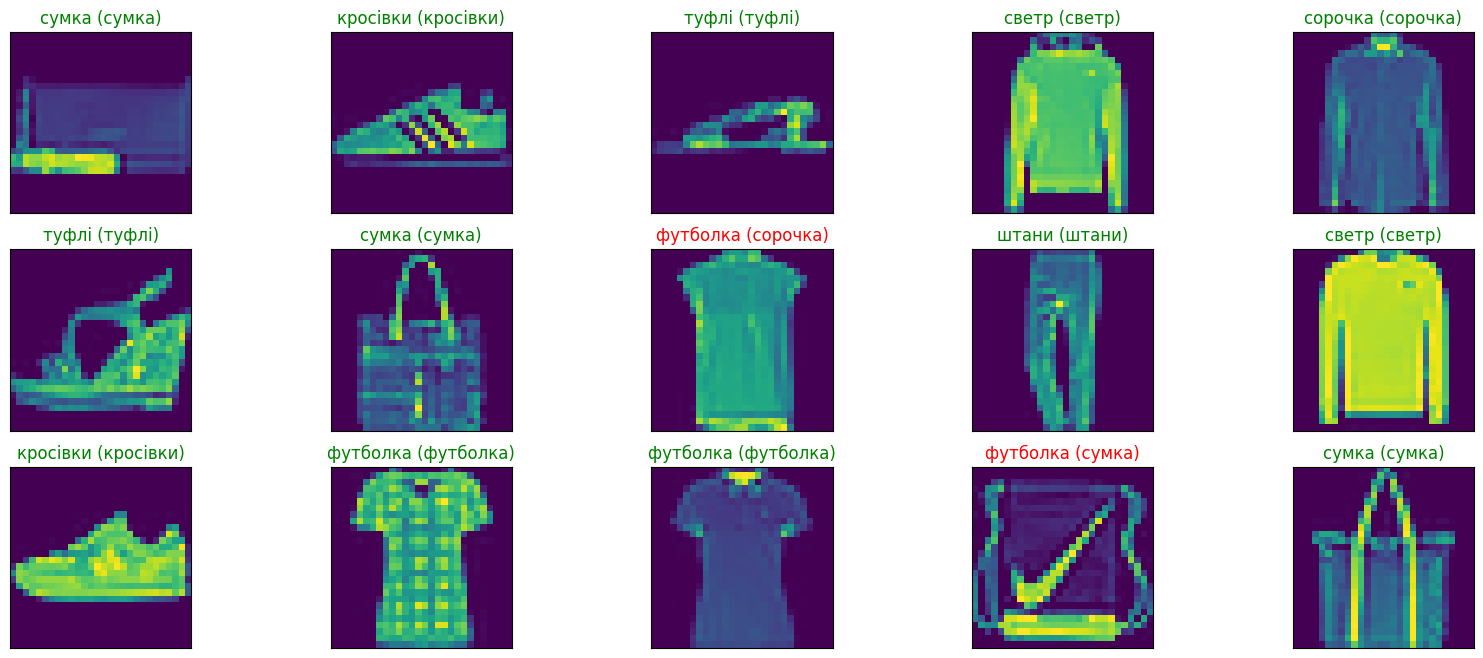

In [180]:
classes = ['футболка', 'штани', 'светр', 'сукня', 'пальто',
           'туфлі', 'сорочка', 'кросівки', 'сумка', 'черевики']

y_hat = model.predict(X_test)
X_test = X_test.reshape(10000, 28, 28)
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(X_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(X_test[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = y_test[index]
    ax.set_title("{} ({})".format(classes[predict_index],
                                  classes[true_index]),
                                  color=("green" if predict_index == true_index else "red"))